### Parabolic sar reversal strategy

In [9]:
import time
from datetime import datetime
import vectorbt as vbt

import pandas as pd
import pandas_ta as ta
import numpy as np
import mplfinance as mpf

import matplotlib.pyplot as plt

### Import CSV

In [10]:
data = pd.read_csv('EURUSD_15m.csv')
data.tail()

timestamp      open      high       low     close  \
15369  2022-06-30 16:45:00+01:00  1.046682  1.048438  1.046572  1.047120   
15370  2022-06-30 17:00:00+01:00  1.047120  1.047340  1.046463  1.046792   
15371  2022-06-30 17:15:00+01:00  1.046682  1.047779  1.046682  1.047669   
15372  2022-06-30 17:30:00+01:00  1.047889  1.048218  1.047230  1.047449   
15373  2022-06-30 17:45:00+01:00  1.047779  1.048878  1.047779  1.048438   

       adj close  volumn  
15369   1.047120       0  
15370   1.046792       0  
15371   1.047669       0  
15372   1.047449       0  
15373   1.048438       0

In [11]:
df = data.copy()
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True).dt.tz_localize(None)
df

timestamp      open      high       low     close  adj close  \
0     2021-11-04 17:00:00  1.154734  1.155135  1.154734  1.155135   1.155135   
1     2021-11-04 17:15:00  1.155135  1.155535  1.155001  1.155135   1.155135   
2     2021-11-04 17:30:00  1.155001  1.155535  1.155001  1.155135   1.155135   
3     2021-11-04 17:45:00  1.155001  1.155535  1.155001  1.155001   1.155001   
4     2021-11-04 18:00:00  1.155135  1.155535  1.155135  1.155535   1.155535   
...                   ...       ...       ...       ...       ...        ...   
15369 2022-06-30 15:45:00  1.046682  1.048438  1.046572  1.047120   1.047120   
15370 2022-06-30 16:00:00  1.047120  1.047340  1.046463  1.046792   1.046792   
15371 2022-06-30 16:15:00  1.046682  1.047779  1.046682  1.047669   1.047669   
15372 2022-06-30 16:30:00  1.047889  1.048218  1.047230  1.047449   1.047449   
15373 2022-06-30 16:45:00  1.047779  1.048878  1.047779  1.048438   1.048438   

       volumn  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
15369       0  
15370       0  
15371       0  
15372       0  
15373       0  

[15374 rows x 7 columns]

### Create strategy

In [4]:
parabolic_sar = ta.Strategy(
    name = 'Parabolic Sar',
    description = 'Parabolic Sar Reversal',
    ta = [
        {'kind': 'psar', 'af0': 0.02, 'af':0.02, 'max_af':0.2},
        {'kind': 'ema', 'length': 200},
        {'kind': 'atr', 'length': 14}
    ]
)
df.ta.strategy(parabolic_sar)
df

timestamp      open      high       low     close  adj close  \
0     2021-11-04 17:00:00  1.154734  1.155135  1.154734  1.155135   1.155135   
1     2021-11-04 17:15:00  1.155135  1.155535  1.155001  1.155135   1.155135   
2     2021-11-04 17:30:00  1.155001  1.155535  1.155001  1.155135   1.155135   
3     2021-11-04 17:45:00  1.155001  1.155535  1.155001  1.155001   1.155001   
4     2021-11-04 18:00:00  1.155135  1.155535  1.155135  1.155535   1.155535   
...                   ...       ...       ...       ...       ...        ...   
15369 2022-06-30 15:45:00  1.046682  1.048438  1.046572  1.047120   1.047120   
15370 2022-06-30 16:00:00  1.047120  1.047340  1.046463  1.046792   1.046792   
15371 2022-06-30 16:15:00  1.046682  1.047779  1.046682  1.047669   1.047669   
15372 2022-06-30 16:30:00  1.047889  1.048218  1.047230  1.047449   1.047449   
15373 2022-06-30 16:45:00  1.047779  1.048878  1.047779  1.048438   1.048438   

       volumn  PSARl_0.02_0.2  PSARs_0.02_0.2  PSARaf_0.02_0.2  \
0           0             NaN             NaN             0.02   
1           0        1.047779             NaN             0.04   
2           0        1.052089             NaN             0.04   
3           0        1.056227             NaN             0.04   
4           0        1.060199             NaN             0.04   
...       ...             ...             ...              ...   
15369       0        1.043443             NaN             0.20   
15370       0        1.044442             NaN             0.20   
15371       0        1.045241             NaN             0.20   
15372       0        1.045880             NaN             0.20   
15373       0        1.046392             NaN             0.20   

       PSARr_0.02_0.2   EMA_200   ATRr_14  
0                   0       NaN       NaN  
1                   0       NaN       NaN  
2                   0       NaN       NaN  
3                   0       NaN       NaN  
4                   0       NaN       NaN  
...               ...       ...       ...  
15369               0  1.047661  0.001367  
15370               0  1.047652  0.001332  
15371               0  1.047652  0.001315  
15372               0  1.047650  0.001292  
15373               0  1.047658  0.001302  

[15374 rows x 13 columns]

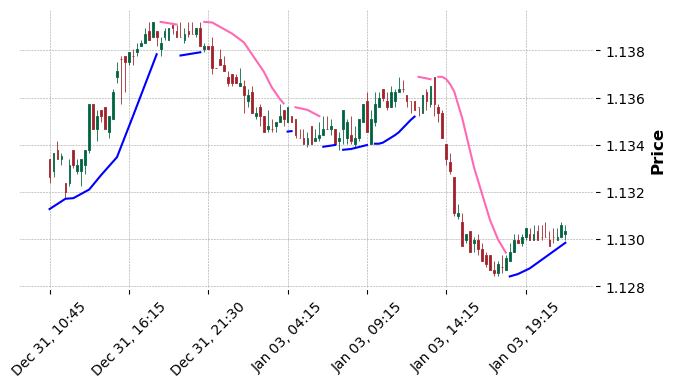

In [5]:
data_test = df.copy()
new_timestamp = data_test['timestamp'].str.split('+', n = 1, expand = True)
data_test['timestamp'] = new_timestamp[0]
data_test['timestamp'] = pd.to_datetime(data_test['timestamp'])
data_test.set_index('timestamp', inplace = True)

psar1 = data_test['PSARl_0.02_0.2'].loc['2021-12-31 10:45:00': '2022-01-03 21:45:00']
psar2 = data_test['PSARs_0.02_0.2'].loc['2021-12-31 10:45:00': '2022-01-03 21:45:00']
psar3 = data_test['PSARaf_0.02_0.2'].loc['2021-12-31 10:45:00': '2022-01-03 21:45:00']
psar4 = data_test['PSARr_0.02_0.2'].loc['2021-12-31 10:45:00': '2022-01-03 21:45:00']

data_test_plot = data_test.loc['2021-12-31 10:45:00': '2022-01-03 21:45:00']

psar1_plot = mpf.make_addplot(psar1, panel=0, color='blue', width=1.5)
psar2_plot = mpf.make_addplot(psar2, panel=0, color='hotpink', width=1.5)
# psar3_plot = mpf.make_addplot(psar3, panel=0, color='green', width=1.5)
# psar4_plot = mpf.make_addplot(psar4, panel=0, color='blue', width=1.5)

mpf.plot(data_test_plot, 
         type='candle', style='charles',
         addplot=[
             psar1_plot, 
             psar2_plot
#              psar3_plot 
#              psar4_plot
         ],
         figsize=(8, 4))

In [6]:
# df[df['PSARs_0.02_0.2'].notnull()]
df[~np.isnan(df['PSARs_0.02_0.2'])]

timestamp      open      high       low     close  \
35     2021-11-05 02:15:00+00:00  1.155135  1.155402  1.155001  1.155135   
36     2021-11-05 02:30:00+00:00  1.155001  1.155268  1.154868  1.154868   
37     2021-11-05 02:45:00+00:00  1.154734  1.154868  1.154601  1.154601   
38     2021-11-05 03:00:00+00:00  1.154601  1.155001  1.154468  1.154601   
39     2021-11-05 03:15:00+00:00  1.154734  1.155135  1.154601  1.154868   
...                          ...       ...       ...       ...       ...   
11276  2022-04-29 13:45:00+01:00  1.052632  1.053963  1.052632  1.053630   
11277  2022-04-29 14:00:00+01:00  1.053186  1.054407  1.052853  1.053519   
11278  2022-04-29 14:15:00+01:00  1.052964  1.054407  1.052964  1.053075   
11279  2022-04-29 14:30:00+01:00  1.053297  1.053741  1.052742  1.052742   
11280  2022-04-29 14:45:00+01:00  1.053186  1.053741  1.052632  1.053741   

       adj close  volumn  PSARl_0.02_0.2  PSARs_0.02_0.2  PSARaf_0.02_0.2  \
35      1.155135       0             NaN        1.156470             0.02   
36      1.154868       0             NaN        1.156441             0.04   
37      1.154601       0             NaN        1.156378             0.06   
38      1.154601       0             NaN        1.156271             0.08   
39      1.154868       0             NaN        1.156127             0.08   
...          ...     ...             ...             ...              ...   
11276   1.053630       0             NaN        1.056228             0.14   
11277   1.053519       0             NaN        1.055554             0.14   
11278   1.053075       0             NaN        1.054974             0.14   
11279   1.052742       0             NaN        1.054476             0.14   
11280   1.053741       0             NaN        1.054407             0.14   

       PSARr_0.02_0.2   EMA_200   ATRr_14  
35                  1       NaN  0.000499  
36                  0       NaN  0.000491  
37                  0       NaN  0.000474  
38                  0       NaN  0.000479  
39                  0       NaN  0.000483  
...               ...       ...       ...  
11276               0  1.055409  0.001253  
11277               0  1.055390  0.001274  
11278               0  1.055367  0.001286  
11279               0  1.055341  0.001266  
11280               0  1.055325  0.001255  

[5802 rows x 13 columns]

### Create Signal

In [18]:
class BacktestParabolicSarReversal:
    def __init__(self, params):
        self.current_action = 'close'
        self.atr = params['atr']
        self.ema = params['ema']
        self.psar = params['psar']
        
        self.pip_value = params['pip_value']
        self.target_tp = params['target_tp']
        self.rr = params['rr']
        self.df = params['df']
        
        self.latest_sl = 0
        self.latest_tp = 0
        
    def reset_order(self):
        self.order = {'action': None, 'open time': None, 'open': None, 'close time': None, \
                      'close': None, 'T/P': None, 'S/L': None,'result': None}
        
    def get_df(self):
        return self.df
        
    def calLotSize(self, entry, exit):
        return abs(round(self.target_tp / (entry - exit)  , 2))
#       return abs(round(self.target_tp / (((entry - exit) / self.pip ) * self.pip_value ) , 2))

    def longCondition(self, row):
        if ~np.isnan(row['PSARl_'+str(self.psar)+'_'+str(self.psar*10)]) and ~np.isnan(row['pre_PSARs']) and \
            (row['close'] > row['EMA_'+str(self.ema)]):
            
            row['entries'] = True
            self.current_action = 'long'
                
            self.latest_sl = row['open'] - row['ATRr_'+str(self.atr)]
            self.latest_tp = row['open'] + (self.rr * abs(row['open'] - self.latest_sl))
            row['lot_size'] = self.calLotSize(row['open'], self.latest_tp)        
            self.willr_status = 'idle'

                
    def longResult(self, row):
        if row['low'] <= self.latest_sl:
            self.current_action = 'close'
            row['exits'] = True
            row['price_action'] = self.latest_sl
            row['lot_size'] = 0
                    
        elif row['high'] >= self.latest_tp:
            self.current_action = 'close'
            row['exits'] = True
            row['price_action'] = self.latest_tp
            row['lot_size'] = 0
        
    def shortCondition(self, row):
        if ~np.isnan(row['PSARs_'+str(self.psar)+'_'+str(self.psar*10)]) and ~np.isnan(row['pre_PSARl']) and \
            (row['close'] < row['EMA_'+str(self.ema)]):
            
            row['short_entries'] = True
            self.current_action = 'short'
                
            self.latest_sl = row['open'] + row['ATRr_'+str(self.atr)]
            self.latest_tp = row['open'] - (self.rr * abs(row['open'] - self.latest_sl))
            row['lot_size'] = self.calLotSize(row['open'], self.latest_tp)        
            self.willr_status = 'idle'
            
    def shortResult(self, row):
        if row['high'] >= self.latest_sl:
            self.current_action = 'close'
            row['short_exits'] = True
            row['price_action'] = self.latest_sl
            row['lot_size'] = 0
                    
        elif row['low'] <= self.latest_tp:
            self.current_action = 'close'
            row['short_exits'] = True
            row['price_action'] = self.latest_tp
            row['lot_size'] = 0
                    
    def createLongOrders(self, row):
        if self.current_action == 'close':
            self.longCondition(row)
        else:
            self.longResult(row)
        
        return row
    
    def createShortOrders(self, row):
        if self.current_action == 'close':
            self.shortCondition(row)
        else:
            self.shortResult(row)
                    
        return row
    
    def createBothOrders(self, row):
        if self.current_action == 'close':
            self.longCondition(row)
            self.shortCondition(row)
            
        elif self.current_action == 'long':
            self.longResult(row)
                    
        elif self.current_action == 'short':
            self.shortResult(row)
                    
        return row
        
    def createStrategy(self):
        parabolic_sar = ta.Strategy(
            name = 'Parabolic Sar',
            description = 'Parabolic Sar Reversal',
            ta = [
                {'kind': 'psar', 'af0': self.psar, 'af': self.psar, 'max_af': self.psar*10},
                {'kind': 'ema', 'length': self.ema},
                {'kind': 'atr', 'length': self.atr}
            ]
        )
        self.df.ta.strategy(parabolic_sar)
        
        self.df['timestamp'] = pd.to_datetime(self.df['timestamp'])
        self.df['entries'] = False
        self.df['exits'] = False
        
        self.df['short_entries'] = False
        self.df['short_exits'] = False
        self.df['price_action'] = self.df['open']
        
        self.df['pre_PSARs'] = self.df['PSARs_'+str(self.psar)+'_'+str(self.psar*10)]
        self.df['pre_PSARl'] = self.df['PSARl_'+str(self.psar)+'_'+str(self.psar*10)]
        self.df['lot_size'] = np.nan
        
    def getBothOrders(self):
        self.createStrategy()
        self.df = self.df.apply(lambda row : self.createBothOrders(row), axis=1)
                                                                
        return self.df
        
    def getLongOrders(self):
        self.createStrategy()
        self.df = self.df.apply(lambda row : self.createLongOrders(row), axis=1)
                                                                
        return self.df
    
    def getShortOrders(self):
        self.createStrategy()
        self.df = self.df.apply(lambda row : self.createShortOrders(row), axis=1)
                                                                
        return self.df

#     def backtest(self):
#         parabolic_sar = ta.Strategy(
#             name = 'Parabolic Sar',
#             description = 'Parabolic Sar Reversal',
#             ta = [
#                 {'kind': 'psar', 'af0': self.psar, 'af': self.psar, 'max_af': self.psar*10},
#                 {'kind': 'ema', 'length': self.ema},
#                 {'kind': 'atr', 'length': self.atr}
#             ]
#         )
#         self.df.ta.strategy(parabolic_sar)
# #         self.df = self.df.copy().dropna()
#         self.df['timestamp'] = pd.to_datetime(self.df['timestamp'])
#         self.df['action'] = None
        
#         self.df['entries'] = False
#         self.df['exits'] = False
#         self.df['short_entries'] = False
#         self.df['short_exits'] = False
#         self.df['price_action'] = self.df['close']
        
#         for index, row in self.df.iterrows():
#             entry = 0
            
#             if self.current_action == 'close' and index > 0:
                
#                 hour = int(str(row['timestamp']).split(' ')[1].split(':')[0])
#                 hour = (hour+7) % 24
#                 if not (hour in [14, 19, 20, 21]): # filter trade time only in high win rate.
#                     continue
                
#                 if ~np.isnan(row['PSARl_'+str(self.psar)+'_'+str(self.psar*10)]) and \
#                     ~np.isnan(self.df.at[index-1, 'PSARs_'+str(self.psar)+'_'+str(self.psar*10)]) and \
#                     (row['close'] > row['EMA_'+str(self.ema)]):
                    
#                     self.df.at[index, 'action'] = 'buy'
#                     self.df.at[index, 'entries'] = True
#                     self.df.at[index, 'price_action'] = row['open']
#                     self.order['action'] = 'buy'
                                
#                     self.order['open time'] = row['timestamp']
#                     self.order['open'] = row['open']
#                     self.order['S/L'] = row['open'] - row['ATRr_'+str(self.atr)]
#                     self.order['T/P'] = row['open'] + (self.rr * abs(row['open'] - self.order['S/L']))
#                     self.current_action = 'buy'
                    
#                 elif ~np.isnan(row['PSARs_'+str(self.psar)+'_'+str(self.psar*10)]) and \
#                     ~np.isnan(self.df.at[index-1, 'PSARl_'+str(self.psar)+'_'+str(self.psar*10)]) and \
#                     (row['close'] < row['EMA_'+str(self.ema)]):
            
#                     self.df.at[index, 'action'] = 'sell'
#                     self.df.at[index, 'short_entries'] = True
#                     self.df.at[index, 'price_action'] = row['open']
#                     self.order['action'] = 'sell'
                                
#                     self.order['open time'] = row['timestamp']
#                     self.order['open'] = row['open']
#                     self.order['S/L'] = row['open'] + row['ATRr_'+str(self.atr)]
#                     self.order['T/P'] = row['open'] - (self.rr * abs(row['open'] - self.order['S/L']))
#                     self.current_action = 'sell'
        
#             if self.current_action == 'buy':
#                 if row['low'] <= self.order['S/L'] and row['high'] >= self.order['T/P']:
#                     self.unknow_result.append(row)
                    
#                 if row['low'] <= self.order['S/L']:
#                     self.df.at[index, 'exits'] = True
#                     self.df.at[index, 'price_action'] = row['low']
                    
#                     self.order['result'] = 'S/L'
#                     self.order['close time'] = row['timestamp']
#                     self.order['close'] = self.order['S/L']
                    
#                     self.current_action = 'close'
#                     self.orders = self.orders.append(self.order, ignore_index = True)
#                     if self.plot == True: self.plot_order(self.order)
#                     self.reset_order()
                    
#                 elif row['high'] >= self.order['T/P']:
#                     self.df.at[index, 'exits'] = True
#                     self.df.at[index, 'price_action'] = row['high']
                    
#                     self.order['result'] = 'T/P'
#                     self.order['close time'] = row['timestamp']
#                     self.order['close'] = self.order['T/P']
                    
#                     self.current_action = 'close'
#                     self.orders = self.orders.append(self.order, ignore_index = True)
#                     if self.plot == True: self.plot_order(self.order)
#                     self.reset_order()

#             elif self.current_action == 'sell':
#                 if row['high'] >= self.order['S/L'] and row['low'] <= self.order['T/P']:
#                     self.unknow_result.append(row)
                    
#                 if row['high'] >= self.order['S/L']:
#                     self.df.at[index, 'short_exits'] = True
#                     self.df.at[index, 'price_action'] = row['high']
                    
#                     self.order['result'] = 'S/L'
#                     self.order['close time'] = row['timestamp']
#                     self.order['close'] = self.order['S/L']
                    
#                     self.current_action = 'close'
#                     self.orders = self.orders.append(self.order, ignore_index = True)
#                     if self.plot == True: self.plot_order(self.order)
#                     self.reset_order()
                    
#                 elif row['low'] <= self.order['T/P']:
#                     self.df.at[index, 'short_exits'] = True
#                     self.df.at[index, 'price_action'] = row['low']
                    
#                     self.order['result'] = 'T/P'
#                     self.order['close time'] = row['timestamp']
#                     self.order['close'] = self.order['T/P']
                    
#                     self.current_action = 'close'
#                     self.orders = self.orders.append(self.order, ignore_index = True)
#                     if self.plot == True: self.plot_order(self.order)
#                     self.reset_order()

#         try:
#             win_rate = round(len(self.orders[self.orders['result'] == 'T/P']) * 100 / len(self.orders), 2)
#             loss_rate = round(len(self.orders[self.orders['result'] == 'S/L']) * 100 / len(self.orders), 2)

#             win_orders = int((win_rate * len(self.orders)) / 100 )
#             loss_orders = len(self.orders) - win_orders
#             gain = (win_orders * self.rr) - loss_orders

#             result_info = f"total orders: {len(self.orders)}\npsar: {self.psar}, ema: {self.ema}, atr: {self.atr}, gain: {gain}\n"
#             return {'win_rate': win_rate, 'info': result_info, 'total_order': len(self.orders), 'rr': self.rr, 'gain': gain, 'unknow': self.unknow_result, 'orders': self.orders}
#         except:
#     #         print("No orders to action")
#             return {'win_rate': 0, 'info': 'No orders to action'}

In [19]:
pair_test = BacktestParabolicSarReversal({
    'atr': 17,
    'psar': 0.01,
    'ema': 200,
    'pip': 0.0001,
    'pip_value': 10,
    'rr': 1.5,
    'target_tp': 10,
    'df': df.copy()
})
result_long = pair_test.getLongOrders().set_index('timestamp')
result_short = pair_test.getShortOrders().set_index('timestamp')
result_both = pair_test.getBothOrders().set_index('timestamp')
result_both

open      high       low     close  adj close  \
timestamp                                                                
2021-11-04 17:00:00  1.154734  1.155135  1.154734  1.155135   1.155135   
2021-11-04 17:15:00  1.155135  1.155535  1.155001  1.155135   1.155135   
2021-11-04 17:30:00  1.155001  1.155535  1.155001  1.155135   1.155135   
2021-11-04 17:45:00  1.155001  1.155535  1.155001  1.155001   1.155001   
2021-11-04 18:00:00  1.155135  1.155535  1.155135  1.155535   1.155535   
...                       ...       ...       ...       ...        ...   
2022-06-30 15:45:00  1.046682  1.048438  1.046572  1.047120   1.047120   
2022-06-30 16:00:00  1.047120  1.047340  1.046463  1.046792   1.046792   
2022-06-30 16:15:00  1.046682  1.047779  1.046682  1.047669   1.047669   
2022-06-30 16:30:00  1.047889  1.048218  1.047230  1.047449   1.047449   
2022-06-30 16:45:00  1.047779  1.048878  1.047779  1.048438   1.048438   

                     volumn  PSARl_0.01_0.1  PSARs_0.01_0.1  PSARaf_0.01_0.1  \
timestamp                                                                      
2021-11-04 17:00:00       0             NaN             NaN             0.01   
2021-11-04 17:15:00       0        1.047779             NaN             0.02   
2021-11-04 17:30:00       0        1.049934             NaN             0.02   
2021-11-04 17:45:00       0        1.052046             NaN             0.02   
2021-11-04 18:00:00       0        1.054116             NaN             0.02   
...                     ...             ...             ...              ...   
2022-06-30 15:45:00       0        1.041099             NaN             0.09   
2022-06-30 16:00:00       0        1.041760             NaN             0.09   
2022-06-30 16:15:00       0        1.042361             NaN             0.09   
2022-06-30 16:30:00       0        1.042908             NaN             0.09   
2022-06-30 16:45:00       0        1.043405             NaN             0.10   

                     PSARr_0.01_0.1   EMA_200   ATRr_17  entries  exits  \
timestamp                                                                 
2021-11-04 17:00:00               0       NaN       NaN    False  False   
2021-11-04 17:15:00               0       NaN       NaN    False  False   
2021-11-04 17:30:00               0       NaN       NaN    False  False   
2021-11-04 17:45:00               0       NaN       NaN    False  False   
2021-11-04 18:00:00               0       NaN       NaN    False  False   
...                             ...       ...       ...      ...    ...   
2022-06-30 15:45:00               0  1.047661  0.001306    False  False   
2022-06-30 16:00:00               0  1.047652  0.001281    False  False   
2022-06-30 16:15:00               0  1.047652  0.001270    False  False   
2022-06-30 16:30:00               0  1.047650  0.001254    False  False   
2022-06-30 16:45:00               0  1.047658  0.001264    False  False   

                     short_entries  short_exits  price_action  pre_PSARs  \
timestamp                                                                  
2021-11-04 17:00:00          False        False      1.154734        NaN   
2021-11-04 17:15:00          False        False      1.155135        NaN   
2021-11-04 17:30:00          False        False      1.155001        NaN   
2021-11-04 17:45:00          False        False      1.155001        NaN   
2021-11-04 18:00:00          False        False      1.155135        NaN   
...                            ...          ...           ...        ...   
2022-06-30 15:45:00          False        False      1.046682        NaN   
2022-06-30 16:00:00          False        False      1.047120        NaN   
2022-06-30 16:15:00          False        False      1.046682        NaN   
2022-06-30 16:30:00          False        False      1.047889        NaN   
2022-06-30 16:45:00          False        False      1.047779        NaN   

                     pre_PSARl  lot_size  
timestamp    

In [20]:
"""
Grid parameter example
psar : 0.01 -> 0.1
atr : 10 -> 30
"""
def create_grid_params(line1_start, line1_end, line2_start, line2_end):
    params = []
    for i in range(line1_start, line1_end+1):
        for j in range(line2_start, line2_end+1):
            params.append([i*0.01, j])
    return params
params_list = create_grid_params(1, 10, 10, 30)
len(params_list)

210

In [36]:
good_params = {'win': 0, 'info': ''}
start = 0
end = 210
win_start = 0

loop_num = start
for param in params_list[start:end]:
    obj = BacktestParabolicSarReversal({'psar': param[0], 'atr': param[1], 'ema': 200,'pip_value': 0.001, 'rr': 1.5, 'df': df.copy(), 'plot': False})
    result = obj.backtest()
    if result['win_rate'] > win_start and result['total_order'] > 120:
        win_start = result['win_rate']
        good_params['win'] = result['win_rate']
        good_params['info'] = result['info']
    loop_num = loop_num + 1
    print(f"run: {loop_num} to {end}", end = "\r")
    
print(f"\nwin rate: {good_params['win']} %\n{good_params['info']}")

run: 210 to 210
win rate: 64.52 %
total orders: 341
psar: 0.01, ema: 200, atr: 19, gain: 209.0



### GBPUSD

* win rate: 62.04 %
* total orders: 324
* psar: 0.01, ema: 200, atr: 25, gain: 178.5

### USDJPY

* win rate: 58.82 %
* total orders: 306
* psar: 0.01, ema: 200, atr: 25, gain: 141.5

### EURUSD

* win rate: 67.43 %
* total orders: 304
* psar: 0.01, ema: 200, atr: 17, gain: 206.0

### AUDUSD

* win rate: 64.52 %
* total orders: 341
* psar: 0.01, ema: 200, atr: 19, gain: 209.0

In [ ]:
good_params = {'win_long': 0, 'info_long': '', 'win_short': 0, 'info_short': ''}
start = 0
end = len(params_list)
win_long = 0
win_short = 0

loop_num = start
for param in params_list[start:end]:
    pair_test = BacktestParabolicSarReversal({
        'atr': param[1],
        'psar': param[0],
        'ema': 200,
        'pip': 0.0001,
        'pip_value': 10,
        'rr': 1.5,
        'target_tp': 10,
        'df': df.copy()
    })
    result_long = pair_test.getLongOrders().set_index('timestamp')
    result_short = pair_test.getShortOrders().set_index('timestamp')
    
    port_long = vbt.Portfolio.from_signals(result_long.price_action,
                                      entries=result_long.entries.astype('bool'),
                                      exits=result_long.exits.astype('bool'),
                                      size=result_long.lot_size, 
                                      freq="15m",
                                      init_cash=20000,
    #                                   fees=0.0005, 
                                      slippage=0.0002
                                     )    

    port_short = vbt.Portfolio.from_signals(result_short.price_action,
                                      short_entries=result_short.short_entries.astype('bool'),
                                      short_exits=result_short.short_exits.astype('bool'),
                                      size=result_short.lot_size,
                                      size_type=0,
                                      freq="15m",
                                      init_cash=20000,
    #                                   fees=0.0005, 
                                      slippage=0.0002
                                     )
    
    stats_long = port_long.stats()
    stats_short = port_short.stats()
    
    
#     result = backtest_rsi_o2(df, ema_len=param[0], rsi_len=param[1], atr_len=param[2], overbought=param[3], oversold=param[4], rr=param[5])
    if stats_long['Win Rate [%]'] > win_long and stats_long['Total Trades'] > 200:
        win_long = stats_long['Win Rate [%]']
        good_params['win_long'] = stats_long['Win Rate [%]']
        good_params['info_long'] = {'Max Drawdown % ': stats_long["Max Drawdown [%]"], 
                                    'atr': param[1],
                                    'ema': 100,
                                    'psar': param[0]
                                   }
        
    if stats_short['Win Rate [%]'] > win_short and stats_short['Total Trades'] > 200:
        win_short = stats_short['Win Rate [%]']
        good_params['win_short'] = stats_short['Win Rate [%]']
        good_params['info_short'] = {'Max Drawdown % ': stats_short["Max Drawdown [%]"], 
                                    'atr': param[1],
                                    'ema': 100,
                                    'psar': param[0]
                                   }
        
    loop_num = loop_num + 1
    print(f"run: {loop_num} to {end}", end = "\r")
    
print(f"\nwin long: {good_params['win_long']} %\n{good_params['info_long']} \nwin short: {good_params['win_short']} %\n{good_params['info_short']} ")

In [7]:
order_ser = result_test['orders']
order_ser[order_ser['result'] == 'T/P']
# ax = order_ser.plot.bar(x='lab', y='close time', rot=0)
order_ser.loc[lambda df: df['result'] == 'T/P',  ['point']] = 1.5
order_ser.loc[lambda df: df['result'] != 'T/P',  ['point']] = -1

order_ser['timestamp'] = pd.to_datetime(order_ser['open time'], utc=True).dt.tz_localize(None)
# order_ser = order_ser.set_index('timestamp')
order_ser

action           open time      open          close time     close  \
0      buy 2021-11-09 13:45:00  1.158883 2021-11-09 13:45:00  1.160018   
1     sell 2021-11-11 07:45:00  1.147315 2021-11-11 08:00:00  1.146305   
2     sell 2021-11-12 14:30:00  1.144558 2021-11-12 15:00:00  1.145209   
3     sell 2021-11-15 07:45:00  1.145738 2021-11-15 08:00:00  1.144968   
4     sell 2021-11-15 14:00:00  1.144820 2021-11-15 15:00:00  1.143791   
..     ...                 ...       ...                 ...       ...   
108   sell 2022-06-24 07:45:00  1.053075 2022-06-24 08:45:00  1.053726   
109    buy 2022-06-24 14:00:00  1.056412 2022-06-24 14:30:00  1.055378   
110    buy 2022-06-27 13:45:00  1.058761 2022-06-27 14:00:00  1.057860   
111   sell 2022-06-29 13:15:00  1.051746 2022-06-29 13:15:00  1.050146   
112   sell 2022-06-30 07:00:00  1.044386 2022-06-30 07:15:00  1.043397   

          T/P       S/L result  point           timestamp  
0    1.160018  1.158126    T/P    1.5 2021-11-09 13:45:00  
1    1.146305  1.147989    T/P    1.5 2021-11-11 07:45:00  
2    1.143580  1.145209    S/L   -1.0 2021-11-12 14:30:00  
3    1.144968  1.146251    T/P    1.5 2021-11-15 07:45:00  
4    1.143791  1.145506    T/P    1.5 2021-11-15 14:00:00  
..        ...       ...    ...    ...                 ...  
108  1.052099  1.053726    S/L   -1.0 2022-06-24 07:45:00  
109  1.057965  1.055378    S/L   -1.0 2022-06-24 14:00:00  
110  1.060113  1.057860    S/L   -1.0 2022-06-27 13:45:00  
111  1.050146  1.052812    T/P    1.5 2022-06-29 13:15:00  
112  1.043397  1.045046    T/P    1.5 2022-06-30 07:00:00  

[113 rows x 10 columns]

In [8]:
idx_point = np.zeros(24)
tp_point = np.zeros(24)
sl_point = np.zeros(24)
win_rate = np.zeros(24)

for index, row in order_ser.iterrows():
    hour = int(str(row['timestamp']).split(' ')[1].split(':')[0])
    hour = (hour+7) % 24
    idx_point[hour] = idx_point[hour] + row['point']
    if (row['result'] == 'T/P'):
        tp_point[hour] = tp_point[hour] + 1
    else: 
        sl_point[hour] = sl_point[hour] + 1
    
for i in range(len(win_rate)):
    if ((tp_point[i] + sl_point[i]) == 0):
        win_rate[i] = 0
    else:
        win_rate[i] = tp_point[i] * 100 / (tp_point[i] + sl_point[i]) / 10
    
# idx_point
win_rate

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  7.71428571,
        0.        ,  0.        ,  0.        ,  0.        , 10.        ,
        7.89473684,  6.89655172,  0.        ,  0.        ])

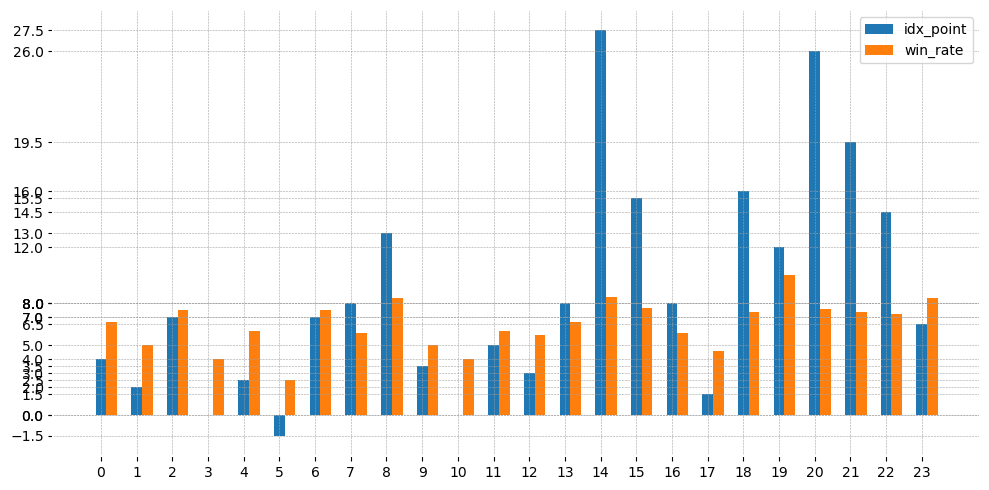

In [47]:
reward_df = pd.DataFrame(data={'time': np.arange(0, 24), 'point': idx_point, 'win_rate': win_rate})
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
x = reward_df['time']
y = reward_df['point']
y2 = reward_df['win_rate']
plt.margins(x=0.05, y=0.05)

# Width of a bar 
width = 0.3   

# plt.bar(x, y2)
plt.bar(x, y , width,label='idx_point')
plt.bar(x+width, y2, width, label='win_rate')

plt.xticks(x)
plt.yticks(y)
plt.legend(loc='best')
plt.show()

# Open at 11, 18, 20, 21, 22 for AUDUSD
# Open at 14, 19, 20, 21 for EURUSD

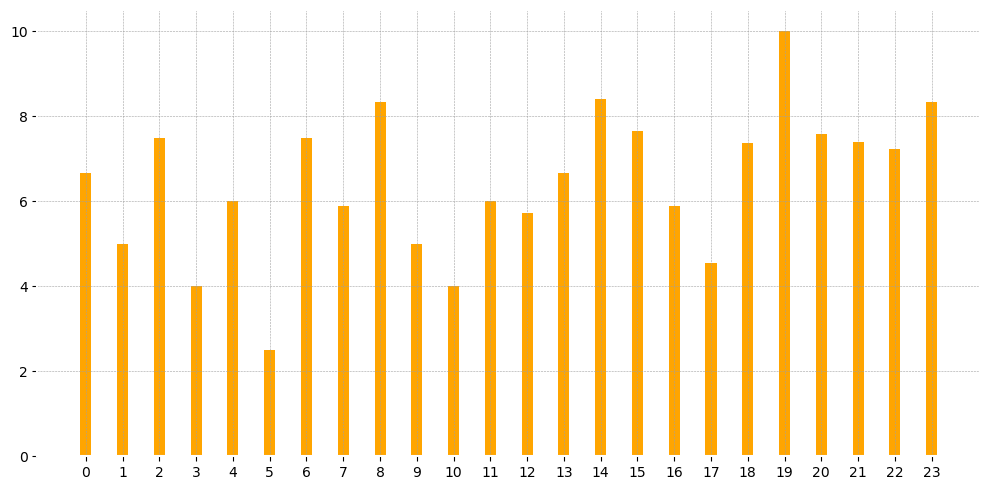

In [46]:
plt.rcParams["figure.figsize"] = [10, 5]
# plt.rcParams["figure.autolayout"] = True
x = reward_df['time']
y = reward_df['win_rate']
# plt.margins(x=0.05, y=0.05)

# plt.bar(x, y2)
plt.bar(x, y , width,label='win_rate', color='orange')

plt.xticks(x)
# plt.yticks(y)
# plt.legend(loc='best')
plt.show()

In [25]:
pair_df = pair_test.get_df().copy()
# pair_df['timestamp'] = pd.to_datetime(pair_df['timestamp'], unit='ms')
pair_df = pair_df.set_index('timestamp')
pair_df

open      high       low     close  adj close  \
timestamp                                                                
2021-11-04 17:00:00  1.154734  1.155135  1.154734  1.155135   1.155135   
2021-11-04 17:15:00  1.155135  1.155535  1.155001  1.155135   1.155135   
2021-11-04 17:30:00  1.155001  1.155535  1.155001  1.155135   1.155135   
2021-11-04 17:45:00  1.155001  1.155535  1.155001  1.155001   1.155001   
2021-11-04 18:00:00  1.155135  1.155535  1.155135  1.155535   1.155535   
...                       ...       ...       ...       ...        ...   
2022-06-30 15:45:00  1.046682  1.048438  1.046572  1.047120   1.047120   
2022-06-30 16:00:00  1.047120  1.047340  1.046463  1.046792   1.046792   
2022-06-30 16:15:00  1.046682  1.047779  1.046682  1.047669   1.047669   
2022-06-30 16:30:00  1.047889  1.048218  1.047230  1.047449   1.047449   
2022-06-30 16:45:00  1.047779  1.048878  1.047779  1.048438   1.048438   

                     volumn  PSARl_0.02_0.2  PSARs_0.02_0.2  PSARaf_0.02_0.2  \
timestamp                                                                      
2021-11-04 17:00:00       0             NaN             NaN             0.02   
2021-11-04 17:15:00       0        1.047779             NaN             0.04   
2021-11-04 17:30:00       0        1.052089             NaN             0.04   
2021-11-04 17:45:00       0        1.056227             NaN             0.04   
2021-11-04 18:00:00       0        1.060199             NaN             0.04   
...                     ...             ...             ...              ...   
2022-06-30 15:45:00       0        1.043443             NaN             0.20   
2022-06-30 16:00:00       0        1.044442             NaN             0.20   
2022-06-30 16:15:00       0        1.045241             NaN             0.20   
2022-06-30 16:30:00       0        1.045880             NaN             0.20   
2022-06-30 16:45:00       0        1.046392             NaN             0.20   

                     PSARr_0.02_0.2  ...  PSARs_0.01_0.1  PSARaf_0.01_0.1  \
timestamp                            ...                                    
2021-11-04 17:00:00               0  ...             NaN             0.01   
2021-11-04 17:15:00               0  ...             NaN             0.02   
2021-11-04 17:30:00               0  ...             NaN             0.02   
2021-11-04 17:45:00               0  ...             NaN             0.02   
2021-11-04 18:00:00               0  ...             NaN             0.02   
...                             ...  ...             ...              ...   
2022-06-30 15:45:00               0  ...             NaN             0.09   
2022-06-30 16:00:00               0  ...             NaN             0.09   
2022-06-30 16:15:00               0  ...             NaN             0.09   
2022-06-30 16:30:00               0  ...             NaN             0.09   
2022-06-30 16:45:00               0  ...             NaN             0.10   

                     PSARr_0.01_0.1   ATRr_17  action  entries  exits  \
timestamp                                                               
2021-11-04 17:00:00               0       NaN    None    False  False   
2021-11-04 17:15:00               0       NaN    None    False  False   
2021-11-04 17:30:00               0       NaN    None    False  False   
2021-11-04 17:45:00               0       NaN    None    False  False   
2021-11-04 18:00:00               0       NaN    None    False  False   
...                             ...       ...     ...      ...    ...   
2022-06-30 15:45:00               0  0.001306    None    False  False   
2022-06-30 16:00:00               0  0.001281    None    False  False   
2022-06-30 16:15:00               0  0.001270    None    False  False   
2022-06-30 16:30:00               0  0.001254    None    False  False   
2022-06-30 16:45:00               0  0.001264    None    False  False   

                    short_entries  short_exits  price_action  
timest

In [29]:
port = vbt.Portfolio.from_signals(pair_df.price_action,
                                  entries=pair_df.entries.astype('bool'),
                                  exits=pair_df.exits.astype('bool'),
                                  short_entries=pair_df.short_entries.astype('bool'),
                                  short_exits=pair_df.short_exits.astype('bool'),
                                  size=10,
#                                   freq="15m",
                                  init_cash=100,
                                  fees=0.0025, 
                                  slippage=0.0025
                                 )

In [30]:
port.plot().show()

<AxesSubplot:xlabel='timestamp'>

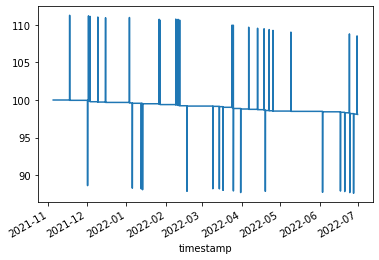

In [28]:
port.cash().plot()

In [43]:
port.stats()

Start                               2021-11-04 17:00:00
End                                 2022-04-29 16:45:00
Period                                117 days 15:15:00
Start Value                                       100.0
End Value                                     99.733638
Total Return [%]                              -0.266362
Benchmark Return [%]                          -8.633246
Max Gross Exposure [%]                        11.487773
Total Fees Paid                                0.318859
Max Drawdown [%]                               0.291292
Max Drawdown Duration                 112 days 01:00:00
Total Trades                                         57
Total Closed Trades                                  57
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                  59.649123
Best Trade [%]                                 0.265052
Worst Trade [%]                               -0